# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
from seaborn import load_dataset

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [16]:
tips = load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip'] 
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [19]:
y, X = patsy.dmatrices('tip ~ sex + smoker + net_bill + time + 1', tips[:5])
X

DesignMatrix with shape (5, 5)
  Intercept  sex[T.Female]  smoker[T.No]  time[T.Dinner]  net_bill
          1              1             1               1     15.98
          1              0             1               1      8.68
          1              0             1               1     17.51
          1              0             1               1     20.37
          1              1             1               1     20.98
  Terms:
    'Intercept' (column 0)
    'sex' (column 1)
    'smoker' (column 2)
    'time' (column 3)
    'net_bill' (column 4)

In [20]:
y, X = patsy.dmatrices('tip ~ sex + smoker + net_bill + time + 1', tips[:5])
X

DesignMatrix with shape (5, 5)
  sex[Male]  sex[Female]  smoker[T.No]  time[T.Dinner]  net_bill
          0            1             1               1     15.98
          1            0             1               1      8.68
          1            0             1               1     17.51
          1            0             1               1     20.37
          0            1             1               1     20.98
  Terms:
    'sex' (columns 0:2)
    'smoker' (column 2)
    'time' (column 3)
    'net_bill' (column 4)

<AxesSubplot:xlabel='net_bill', ylabel='tip'>

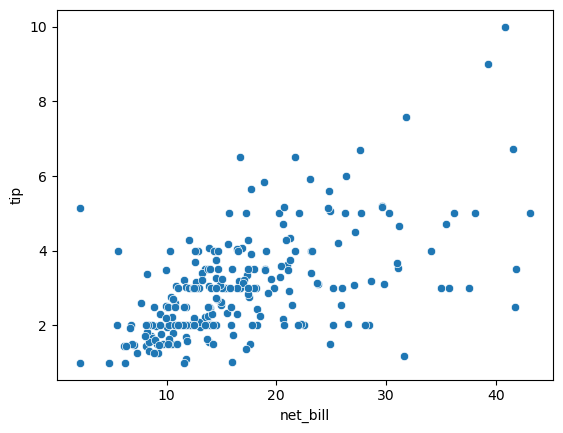

In [29]:
sns.scatterplot(x = 'net_bill', y = 'tip', data = tips)

In [43]:
reg = smf.ols('tip ~  np.log(net_bill+.1)', data = tips).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     101.6
Date:                Thu, 08 Dec 2022   Prob (F-statistic):           3.53e-20
Time:                        21:31:23   Log-Likelihood:                -382.18
No. Observations:                 244   AIC:                             768.4
Df Residuals:                     242   BIC:                             775.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -1.31

In [44]:
reg = smf.ols('tip ~  np.power(net_bill,2)', data = tips).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     104.1
Date:                Thu, 08 Dec 2022   Prob (F-statistic):           1.47e-20
Time:                        21:31:53   Log-Likelihood:                -381.31
No. Observations:                 244   AIC:                             766.6
Df Residuals:                     242   BIC:                             773.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 2.25

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [37]:
y, X = patsy.dmatrices('tip ~ sex + smoker + net_bill + time + 1', tips[:5])
X

DesignMatrix with shape (5, 5)
  Intercept  sex[T.Female]  smoker[T.No]  time[T.Dinner]  net_bill
          1              1             1               1     15.98
          1              0             1               1      8.68
          1              0             1               1     17.51
          1              0             1               1     20.37
          1              1             1               1     20.98
  Terms:
    'Intercept' (column 0)
    'sex' (column 1)
    'smoker' (column 2)
    'time' (column 3)
    'net_bill' (column 4)

In [38]:
y, X = patsy.dmatrices('tip ~ sex + smoker + net_bill + time + 1', tips[:5])
X

DesignMatrix with shape (5, 5)
  Intercept  sex[T.Female]  smoker[T.No]  time[T.Dinner]  net_bill
          1              1             1               1     15.98
          1              0             1               1      8.68
          1              0             1               1     17.51
          1              0             1               1     20.37
          1              1             1               1     20.98
  Terms:
    'Intercept' (column 0)
    'sex' (column 1)
    'smoker' (column 2)
    'time' (column 3)
    'net_bill' (column 4)

<AxesSubplot:xlabel='net_bill', ylabel='tip'>

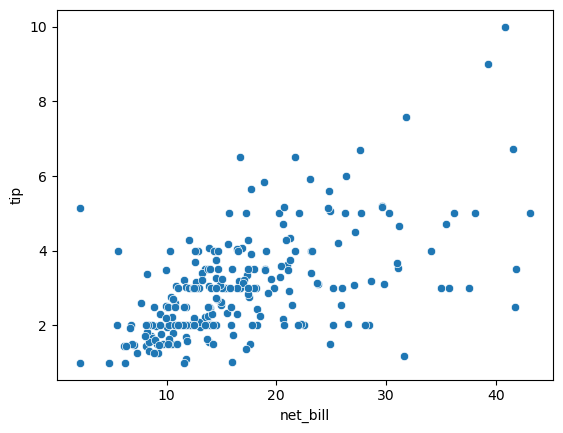

In [39]:
sns.scatterplot(x = 'net_bill', y = 'tip', data = tips)

In [46]:
reg = smf.ols('tip ~  np.log(net_bill+.1)', data = tips).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     101.6
Date:                Thu, 08 Dec 2022   Prob (F-statistic):           3.53e-20
Time:                        21:32:41   Log-Likelihood:                -382.18
No. Observations:                 244   AIC:                             768.4
Df Residuals:                     242   BIC:                             775.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -1.31

In [45]:
reg = smf.ols('tip ~  np.power(net_bill,2)', data = tips).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     104.1
Date:                Thu, 08 Dec 2022   Prob (F-statistic):           1.47e-20
Time:                        21:32:37   Log-Likelihood:                -381.31
No. Observations:                 244   AIC:                             766.6
Df Residuals:                     242   BIC:                             773.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 2.25

In [47]:
tips['tip'] = np.exp(reg.fittedvalues)

tips[['tip', 'net_bill']].corr().iloc[0,1]**2

0.9768218564436976

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [57]:
pr = pd.read_csv('previsao_de_renda.csv')
pr.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [58]:
reg = smf.ols('renda ~ tempo_emprego', data = pr).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     2294.
Date:                Thu, 08 Dec 2022   Prob (F-statistic):               0.00
Time:                        22:03:15   Log-Likelihood:            -1.2249e+05
No. Observations:               12466   AIC:                         2.450e+05
Df Residuals:                   12464   BIC:                         2.450e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2653.9453     60.924     43.561      0.000    2534.525    2773.366
tempo_emprego   283.3509      5.916     47.892      0.000     271.754     294.948
==============================================================================
Omnibus:                     9974.393   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           387626.996
Skew:                           3.561   Prob(JB):                         0.00
Kurtosis:                      29.373   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='tempo_emprego', ylabel='renda'>

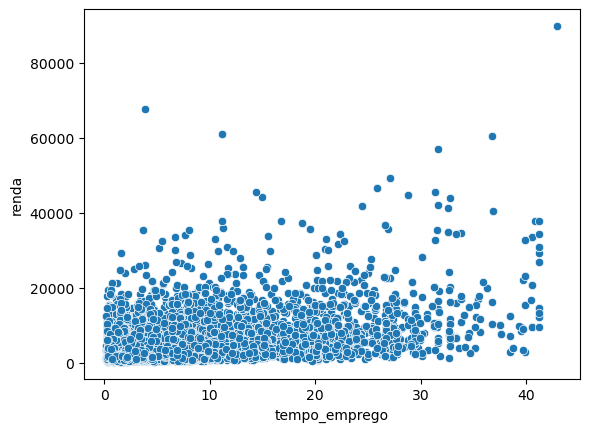

In [85]:
sns.scatterplot(x = 'tempo_emprego', y = 'renda', data = pr)

In [78]:
reg = smf.ols('renda ~ tipo_renda + posse_de_imovel + idade + 1', data = pr).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     98.75
Date:                Thu, 08 Dec 2022   Prob (F-statistic):          2.67e-122
Time:                        22:13:47   Log-Likelihood:            -1.4759e+05
No. Observations:               15000   AIC:                         2.952e+05
Df Residuals:                   14993   BIC:                         2.953e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                       1430.3208    183.227      7.806      0.000    1071.174    1789.467
tipo_renda[T.Bolsista]          -807.6249   2271.436     -0.356      0.722   -5259.918    3644.668
tipo_renda[T.Empresário]         713.2863     94.189      7.573      0.000     528.664     897.909
tipo_renda[T.Pensionista]      -2388.9023    129.434    -18.457      0.000   -2642.608   -2135.196
tipo_renda[T.Servidor público]  1070.1947    135.311      7.909      0.000     804.968    1335.421
posse_de_imovel[T.True]          286.4168     79.614      3.598      0.000     130.363     442.470
idade                             71.9794      4.223     17.043      0.000      63.701      80.258
==============================================================================
Omnibus:                    12702.682   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           559507.953
Skew:                           3.854   Prob(JB):                         0.00
Kurtosis:                      31.910   Cond. No.                     2.77e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [77]:
reg = smf.ols('renda ~ tipo_renda + posse_de_imovel + idade + 0', data = pr).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     98.75
Date:                Thu, 08 Dec 2022   Prob (F-statistic):          2.67e-122
Time:                        22:13:37   Log-Likelihood:            -1.4759e+05
No. Observations:               15000   AIC:                         2.952e+05
Df Residuals:                   14993   BIC:                         2.953e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
tipo_renda[Assalariado]       1430.3208    183.227      7.806      0.000    1071.174    1789.467
tipo_renda[Bolsista]           622.6959   2281.287      0.273      0.785   -3848.905    5094.297
tipo_renda[Empresário]        2143.6071    190.302     11.264      0.000    1770.593    2516.622
tipo_renda[Pensionista]       -958.5815    268.166     -3.575      0.000   -1484.220    -432.943
tipo_renda[Servidor público]  2500.5155    217.704     11.486      0.000    2073.789    2927.242
posse_de_imovel[T.True]        286.4168     79.614      3.598      0.000     130.363     442.470
idade                           71.9794      4.223     17.043      0.000      63.701      80.258
==============================================================================
Omnibus:                    12702.682   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           559507.953
Skew:                           3.854   Prob(JB):                         0.00
Kurtosis:                      31.910   Cond. No.                     2.79e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.79e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [80]:
pr['res_log'] = reg.resid
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     98.75
Date:                Thu, 08 Dec 2022   Prob (F-statistic):          2.67e-122
Time:                        22:14:47   Log-Likelihood:            -1.4759e+05
No. Observations:               15000   AIC:                         2.952e+05
Df Residuals:                   14993   BIC:                         2.953e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                       1430.3208    183.227      7.806      0.000    1071.174    1789.467
tipo_renda[T.Bolsista]          -807.6249   2271.436     -0.356      0.722   -5259.918    3644.668
tipo_renda[T.Empresário]         713.2863     94.189      7.573      0.000     528.664     897.909
tipo_renda[T.Pensionista]      -2388.9023    129.434    -18.457      0.000   -2642.608   -2135.196
tipo_renda[T.Servidor público]  1070.1947    135.311      7.909      0.000     804.968    1335.421
posse_de_imovel[T.True]          286.4168     79.614      3.598      0.000     130.363     442.470
idade                             71.9794      4.223     17.043      0.000      63.701      80.258
==============================================================================
Omnibus:                    12702.682   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           559507.953
Skew:                           3.854   Prob(JB):                         0.00
Kurtosis:                      31.910   Cond. No.                     2.77e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:xlabel='tipo_renda', ylabel='renda'>

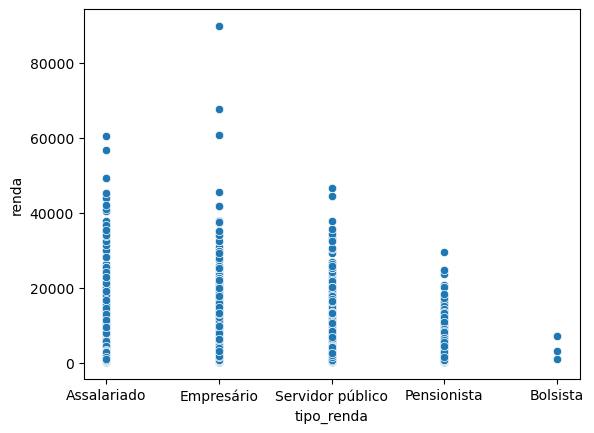

In [86]:
sns.scatterplot(x = 'tipo_renda', y = 'renda', data = pr)

<AxesSubplot:xlabel='posse_de_imovel', ylabel='idade'>

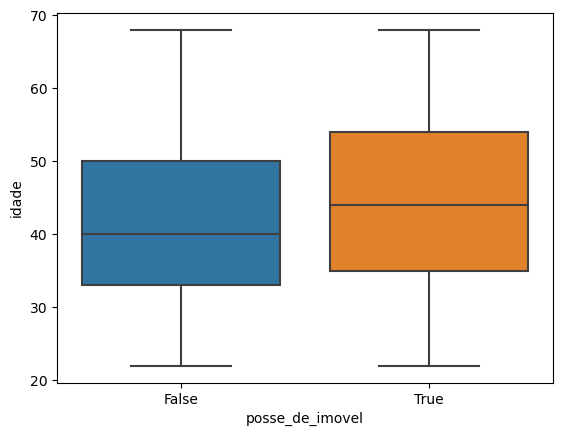

In [87]:
sns.boxplot(x = 'posse_de_imovel', y = 'idade', data = pr)